In [14]:
import os
import zarr
import numpy as np
from termcolor import cprint
from diffusion_policy_3d.common.replay_buffer import ReplayBuffer

def print_zarr_info(zarr_path):
    """
    读取并打印zarr文件的基本信息
    """
    # 检查文件是否存在
    if not os.path.exists(zarr_path):
        cprint(f"Error: File {zarr_path} does not exist!", "red")
        return

    # 使用ReplayBuffer加载zarr文件
    try:
        buffer = ReplayBuffer.copy_from_path(zarr_path)
        
        # 打印基本信息
        cprint("-" * 50, "cyan")
        cprint("Zarr File Information:", "cyan")
        cprint(f"Path: {zarr_path}", "cyan")
        cprint(f"Number of episodes: {buffer.n_episodes}", "green")
        cprint(f"Total steps: {buffer.n_steps}", "green")
        
        # 打印数据键和对应的数组信息
        cprint("\nData Arrays:", "cyan")
        for key, value in buffer.items():
            if key != 'img':
                continue
            cprint(f"\nKey: {key}", "yellow")
            cprint(f"Shape: {value.shape}", "green")
            cprint(f"Dtype: {value.dtype}", "green")
            if isinstance(value, np.ndarray) or isinstance(value, zarr.Array):
                cprint(f"Value range: [{np.min(value):.3f}, {np.max(value):.3f}]", "green")
            
            # print the first 1 images ndarray
            print(value[0])
            
            # 如果是图像数据，打印额外信息
            if key == 'img':
                if len(value.shape) == 4:
                    cprint(f"Image format: {value.shape[1:]} (HxWxC or CxHxW)", "green")
                # return images
                images = value
            
        # 打印episode_ends信息
        cprint("\nEpisode Information:", "cyan")
        episode_ends = buffer.episode_ends
        episode_lengths = np.diff(np.concatenate([[0], episode_ends]))
        cprint(f"Episode lengths: min={np.min(episode_lengths)}, max={np.max(episode_lengths)}, "
               f"mean={np.mean(episode_lengths):.1f}", "green")
        
        return images

    except Exception as e:
        cprint(f"Error reading zarr file: {str(e)}", "red")
        return None    


In [16]:
# 可以修改为你的zarr文件路径
# zarr_path = "./adroit_hammer_expert.zarr"
zarr_path = "./metaworld_box-close_expert.zarr"

# 打印文件信息
# 在使用返回值之前检查是否为None
images = print_zarr_info(zarr_path)
print(images[0])

Replay Buffer: action, shape (2000, 4), dtype float32, range -4.55~6.91
Replay Buffer: depth, shape (2000, 128, 128), dtype float32, range 0.54~2.85
Replay Buffer: full_state, shape (2000, 39), dtype float32, range -0.24~1.00
Replay Buffer: img, shape (2000, 128, 128, 3), dtype uint8, range 0.00~255.00
Replay Buffer: point_cloud, shape (2000, 1024, 6), dtype float32, range -1.08~255.00
Replay Buffer: state, shape (2000, 9), dtype float32, range -0.10~0.94
--------------------------
--------------------------------------------------
Zarr File Information:
Path: ./metaworld_box-close_expert.zarr
Number of episodes: 10
Total steps: 2000

Data Arrays:

Key: img
Shape: (2000, 128, 128, 3)
Dtype: uint8
Value range: [0.000, 255.000]
[[[127 126 122]
  [127 126 122]
  [127 126 122]
  ...
  [127 126 122]
  [127 126 122]
  [127 126 122]]

 [[127 126 122]
  [127 126 122]
  [127 126 122]
  ...
  [127 126 122]
  [127 126 122]
  [127 126 122]]

 [[127 126 122]
  [127 126 122]
  [127 126 122]
  ...
  

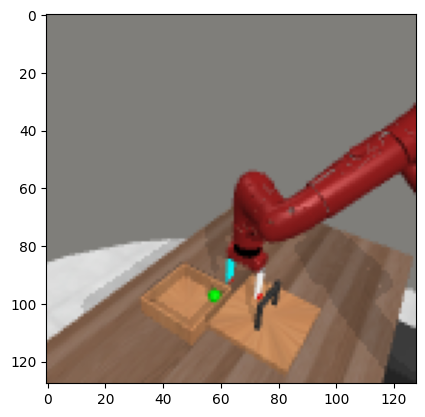

In [17]:
import matplotlib.pyplot as plt
# plot the images[0]
plt.imshow(images[0])
plt.show()